# Multi-Step MLP Models

references :

- How to Develop Multilayer Perceptron Models for Time Series Forecasting

  https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/
  


- Exploratory Configuration of a Multilayer Perceptron Network for Time Series Forecasting 

  https://machinelearningmastery.com/exploratory-configuration-multilayer-perceptron-network-time-series-forecasting/  


## Example case

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import matplotlib

##### transform the data

In [21]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


##### build model 

In [22]:
# define model
model = Sequential()

# hidden layer, 100 neurons, relu activation function
model.add(Dense(100, activation='relu', input_dim=n_steps)) 

# output layer
model.add(Dense(n_steps_out))

# loss function
model.compile(optimizer='adam', loss='mse')

##### fit model

In [23]:
# fit model
model.fit(X, y, epochs=2000, verbose=0)

In [24]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.38835 113.17945]]


##### calculate MSE

In [27]:
# calculate the MSE

y_test = array([100, 110])
mse = mean_squared_error([y_test], yhat)
mse

6.018214156065369

## Web traffic case

In [7]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


##### read dataset

In [8]:
wt_df = read_csv('train_2.csv', nrows=1)
wt_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,19,33,33,18,16,27,29,23,54,38


##### select and transform dataframe row to sequence

In [9]:
# take only the values without the page name

def get_seq_by_row(input_df, row_num):
    new_seq = np.delete(input_df.iloc[row_num].values, 0)
    return new_seq

wt_seq = get_seq_by_row(wt_df,0)

In [10]:
wt_seq

array([18, 11, 5, 13, 14, 9, 9, 22, 26, 24, 19, 10, 14, 15, 8, 16, 8, 8,
       16, 7, 11, 10, 20, 18, 15, 14, 49, 10, 16, 18, 8, 5, 9, 7, 13, 9,
       7, 4, 11, 10, 5, 9, 9, 9, 9, 13, 4, 15, 25, 9, 5, 6, 20, 3, 14, 46,
       5, 5, 13, 4, 9, 10, 9, 11, 11, 11, 9, 15, 5, 10, 7, 4, 8, 9, 10, 6,
       13, 16, 6, 24, 9, 11, 12, 8, 14, 6, 6, 11, 14, 6, 10, 20, 7, 15, 8,
       15, 5, 8, 8, 5, 11, 165, 34, 6, 13, 8, 9, 11, 26, 18, 3, 5, 12, 6,
       16, 19, 9, 10, 11, 11, 7, 9, 10, 24, 6, 6, 8, 16, 13, 10, 10, 6, 5,
       20, 6, 47, 9, 9, 12, 11, 17, 15, 14, 11, 97, 11, 12, 11, 14, 15,
       12, 104, 5, 22, 45, 75, 29, 34, 20, 12, 25, 9, 62, 20, 19, 8, 23,
       13, 16, 34, 36, 11, 18, 12, 24, 30, 27, 44, 35, 53, 11, 26, 13, 18,
       9, 16, 6, 19, 20, 19, 22, 30, 14, 16, 22, 15, 15, 26, 16, 13, 27,
       18, 13, 32, 31, 16, 38, 18, 9, 14, 10, 24, 8, 15, 18, 10, 23, 17,
       11, 26, 14, 8, 12, 9, 11, 34, 17, 29, 11, 9, 14, 21, 12, 11, 13,
       11, 13, 16, 13, 19, 21, 14, 11, 35,

##### transform sequence to supervised format

In [11]:
# frame a sequence as a supervised learning problem

def timeseries_to_supervised(data, lag=1, stepahead=1):
    df = DataFrame(data)
    col_num = lag+stepahead
    columns = [df.shift(i) for i in range(1, col_num)]
    columns = list(reversed(columns))
    columns.append(df)
    df = concat(columns, axis=1)    
    return df.values[col_num - 1:,:]

In [12]:
time_step_lag = 2
time_step_ahead = 3

In [13]:
wt_supervised = timeseries_to_supervised(wt_seq, time_step_lag, time_step_ahead)
wt_supervised

array([[18, 11, 5, 13, 14],
       [11, 5, 13, 14, 9],
       [5, 13, 14, 9, 9],
       ...,
       [18, 16, 27, 29, 23],
       [16, 27, 29, 23, 54],
       [27, 29, 23, 54, 38]], dtype=object)

#### split train and test set

In [14]:
def split_train_and_test_set(dataset, num_of_test_set=12):
    num_of_test_set = -1 * num_of_test_set
    return dataset[0:num_of_test_set], dataset[num_of_test_set:]    

In [15]:
train, test = split_train_and_test_set(wt_supervised)

In [16]:
test

array([[25, 47, 44, 26, 24],
       [47, 44, 26, 24, 21],
       [44, 26, 24, 21, 19],
       [26, 24, 21, 19, 33],
       [24, 21, 19, 33, 33],
       [21, 19, 33, 33, 18],
       [19, 33, 33, 18, 16],
       [33, 33, 18, 16, 27],
       [33, 18, 16, 27, 29],
       [18, 16, 27, 29, 23],
       [16, 27, 29, 23, 54],
       [27, 29, 23, 54, 38]], dtype=object)

#### scale sequence value

In [17]:
# scale train and test data to [-1, 1]

def scale(train, test):
    
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)

    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    
    return scaler, train_scaled, test_scaled

In [18]:
scaler, train_scaled, test_scaled = scale(train, test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
test_scaled

array([[-0.90965092, -0.81930185, -0.83162218, -0.90554415, -0.9137577 ],
       [-0.81930185, -0.83162218, -0.90554415, -0.9137577 , -0.92607803],
       [-0.83162218, -0.90554415, -0.9137577 , -0.92607803, -0.93429158],
       [-0.90554415, -0.9137577 , -0.92607803, -0.93429158, -0.87679671],
       [-0.9137577 , -0.92607803, -0.93429158, -0.87679671, -0.87679671],
       [-0.92607803, -0.93429158, -0.87679671, -0.87679671, -0.93839836],
       [-0.93429158, -0.87679671, -0.87679671, -0.93839836, -0.94661191],
       [-0.87679671, -0.87679671, -0.93839836, -0.94661191, -0.90143737],
       [-0.87679671, -0.93839836, -0.94661191, -0.90143737, -0.89322382],
       [-0.93839836, -0.94661191, -0.90143737, -0.89322382, -0.91786448],
       [-0.94661191, -0.90143737, -0.89322382, -0.91786448, -0.79055441],
       [-0.90143737, -0.89322382, -0.91786448, -0.79055441, -0.85626283]])

In [20]:
test_scaled[:,0:-1]

array([[-0.90965092, -0.81930185, -0.83162218, -0.90554415],
       [-0.81930185, -0.83162218, -0.90554415, -0.9137577 ],
       [-0.83162218, -0.90554415, -0.9137577 , -0.92607803],
       [-0.90554415, -0.9137577 , -0.92607803, -0.93429158],
       [-0.9137577 , -0.92607803, -0.93429158, -0.87679671],
       [-0.92607803, -0.93429158, -0.87679671, -0.87679671],
       [-0.93429158, -0.87679671, -0.87679671, -0.93839836],
       [-0.87679671, -0.87679671, -0.93839836, -0.94661191],
       [-0.87679671, -0.93839836, -0.94661191, -0.90143737],
       [-0.93839836, -0.94661191, -0.90143737, -0.89322382],
       [-0.94661191, -0.90143737, -0.89322382, -0.91786448],
       [-0.90143737, -0.89322382, -0.91786448, -0.79055441]])

#### build model

In [21]:
# fit an MLP network to training data

def fit_model(train, batch_size, nb_epoch, neurons, time_step_ahead):
    
    X, y = train[:, 0:-time_step_ahead], train[:, -time_step_ahead:]

    model = Sequential()
    
    # hidden layer
    model.add(Dense(neurons, activation='relu', input_dim=X.shape[1]))
    
    # output layer
    model.add(Dense(time_step_ahead))
    
    # loss function
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # model fitting
    #model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=0, shuffle=False)
    model.fit(X, y, epochs=nb_epoch, verbose=0, shuffle=False)
    
    return model

#### fit model 

In [22]:
batch_size = 4
epochs = 1000
neurons = 3

In [23]:
model = fit_model(train_scaled, batch_size, epochs, neurons, time_step_ahead)

#### make forecasting

In [24]:
def evaluate(model, scaled_input, time_step_ahead):
    
    eval_input = scaled_input[:,0:-time_step_ahead]
    
    output = model.predict(eval_input)
    
    return output

In [25]:
train_output = evaluate(model, train_scaled, time_step_ahead)
train_output

array([[-0.9172718 , -0.91317034, -0.9101887 ],
       [-0.9279801 , -0.9234936 , -0.9215299 ],
       [-0.92588395, -0.92266595, -0.92618877],
       ...,
       [-0.8852755 , -0.8920762 , -0.8799412 ],
       [-0.9029693 , -0.9014539 , -0.9000593 ],
       [-0.9030435 , -0.9020603 , -0.9023249 ]], dtype=float32)

In [26]:
test_output = evaluate(model, test_scaled, time_step_ahead)
test_output

array([[-0.885231  , -0.88933486, -0.89728075],
       [-0.8703723 , -0.8730711 , -0.8701591 ],
       [-0.8866364 , -0.88581496, -0.8774218 ],
       [-0.9014541 , -0.9001409 , -0.89869493],
       [-0.9052237 , -0.9032719 , -0.9015394 ],
       [-0.90903044, -0.9067063 , -0.9055167 ],
       [-0.9002355 , -0.9012531 , -0.9063931 ],
       [-0.8893689 , -0.88993937, -0.88891286],
       [-0.90205026, -0.9006195 , -0.89426714],
       [-0.91357625, -0.9106455 , -0.9096098 ],
       [-0.9069986 , -0.90670717, -0.9108335 ],
       [-0.8969824 , -0.8968079 , -0.89686745]], dtype=float32)

#### invert scale the prediction

In [27]:
# inverse scaling for a forecasted value

def invert_scale(scaler, X, yhat):    
    new_row = [x for x in X] + [x for x in yhat]    
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    
    return inverted[0, -len(yhat):]

def invert_scale_prediction(scaler, scaled_set, scaled_output):
    scaled_input = scaled_set[:,0:-time_step_ahead]
    predictions = list()

    for i in range(len(scaled_output)):
        yhat = scaled_output[i]
        X = scaled_input[i]

        # invert scaling
        yhat = invert_scale(scaler, X, yhat)    

        # store forecast
        predictions.append(yhat)
    
    return predictions

In [28]:
train_unscaled_output = invert_scale_prediction(scaler, train_scaled, train_output)
train_unscaled_output

[array([23.14431843, 24.14302278, 24.86905766]),
 array([20.53683957, 21.62930262, 22.107472  ]),
 array([21.04725847, 21.83084029, 20.97303525]),
 array([22.7392402 , 23.52801794, 23.43347549]),
 array([22.02838668, 23.10999346, 23.59655178]),
 array([21.08339766, 22.12612215, 22.07641262]),
 array([23.42299658, 23.72456288, 22.44286981]),
 array([26.59987813, 26.77450734, 26.50804976]),
 array([26.99592882, 27.31569535, 27.66778395]),
 array([25.71808189, 26.3073684 , 26.91877383]),
 array([22.94122779, 23.80379334, 24.66376093]),
 array([22.17223227, 22.93768644, 22.52137458]),
 array([23.10819376, 23.84775543, 23.7656948 ]),
 array([21.93780649, 22.98987782, 23.6464645 ]),
 array([22.15416268, 22.79005277, 21.96969315]),
 array([21.98988175, 22.92002323, 23.6399188 ]),
 array([20.71441507, 21.80637014, 21.74416429]),
 array([22.15416268, 22.79005277, 21.96969315]),
 array([21.59232163, 22.37336355, 23.1181792 ]),
 array([21.06532806, 21.97847396, 21.52471668]),
 array([21.64134902,

In [29]:
test_unscaled_output = invert_scale_prediction(scaler, test_scaled, test_output)
test_unscaled_output

[array([30.9462471 , 29.94696221, 28.01213673]),
 array([34.56434608, 33.90719336, 34.61626169]),
 array([30.60404235, 30.80405608, 32.8477926 ]),
 array([26.99592882, 27.31569535, 27.66778395]),
 array([26.07802242, 26.55328906, 26.97515967]),
 array([25.15108848, 25.71702239, 26.00668743]),
 array([27.29266205, 27.04486912, 25.79327753]),
 array([29.93867487, 29.79976395, 30.04971942]),
 array([26.85076249, 27.19915009, 28.74595097]),
 array([24.04418427, 24.75782442, 25.01001501]),
 array([25.64584705, 25.71680468, 24.71204811]),
 array([28.08479246, 28.12727416, 28.11277494])]

#### calculate root mean squared error

In [30]:
def calculate_rmse(original, prediction, time_step_ahead):
    
    test_output = original[:,-time_step_ahead:]
    rmse = sqrt(mean_squared_error(test_output, prediction))
    
    return rmse

In [31]:
train_rmse = calculate_rmse(train, train_unscaled_output, time_step_ahead)

print('Train RMSE: %.3f' % (train_rmse))

Train RMSE: 25.880


In [32]:
test_rmse = calculate_rmse(test, test_unscaled_output, time_step_ahead)

print('Test RMSE: %.3f' % (test_rmse))

Test RMSE: 10.140


#### vary the time step lag

In [57]:
# config

# time_step_lag = 2
time_step_lag_array = np.arange(20,26)

time_step_ahead = 30

num_of_test_set = time_step_ahead

batch_size = 4
epochs = 2000
neurons = 20



train_rmse_array = []
test_rmse_array = []

for time_step_lag in time_step_lag_array:

    # tranform data to NN input format
    wt_supervised = timeseries_to_supervised(wt_seq, time_step_lag, time_step_ahead)

    # split train and test set
    train, test = split_train_and_test_set(wt_supervised)

    # scale dataset
    scaler, train_scaled, test_scaled = scale(train, test)
    
    # fit model
    model = fit_model(train_scaled, batch_size, epochs, neurons, time_step_ahead)

    # evaluate train set
    train_output = evaluate(model, train_scaled, time_step_ahead)
    train_unscaled_output = invert_scale_prediction(scaler, train_scaled, train_output)
    train_rmse = calculate_rmse(train, train_unscaled_output, time_step_ahead)
    train_rmse_array.append(train_rmse)
    
    # evaluate test set
    test_output = evaluate(model, test_scaled, time_step_ahead)
    test_unscaled_output = invert_scale_prediction(scaler, test_scaled, test_output)
    test_rmse = calculate_rmse(test, test_unscaled_output, time_step_ahead)
    test_rmse_array.append(test_rmse)
    
    print('%d) TrainRMSE=%f, TestRMSE=%f' % (time_step_lag, train_rmse, test_rmse))    

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


20) TrainRMSE=26.777010, TestRMSE=12.619909


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


21) TrainRMSE=26.830019, TestRMSE=12.590776


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


22) TrainRMSE=26.823000, TestRMSE=12.721199


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


23) TrainRMSE=26.918073, TestRMSE=12.508846


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


24) TrainRMSE=26.917271, TestRMSE=12.545568


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


25) TrainRMSE=26.919095, TestRMSE=12.637139


In [58]:
#x = []
#x.append(2)
#x.append(4)
#print(x)
print([round(x,2) for x in train_rmse_array])
print([round(x,2) for x in test_rmse_array])
#print(len(test_unscaled_output))

print(len(test))



[26.78, 26.83, 26.82, 26.92, 26.92, 26.92]
[12.62, 12.59, 12.72, 12.51, 12.55, 12.64]
12


#### plot RMSE

<IPython.core.display.Javascript object>


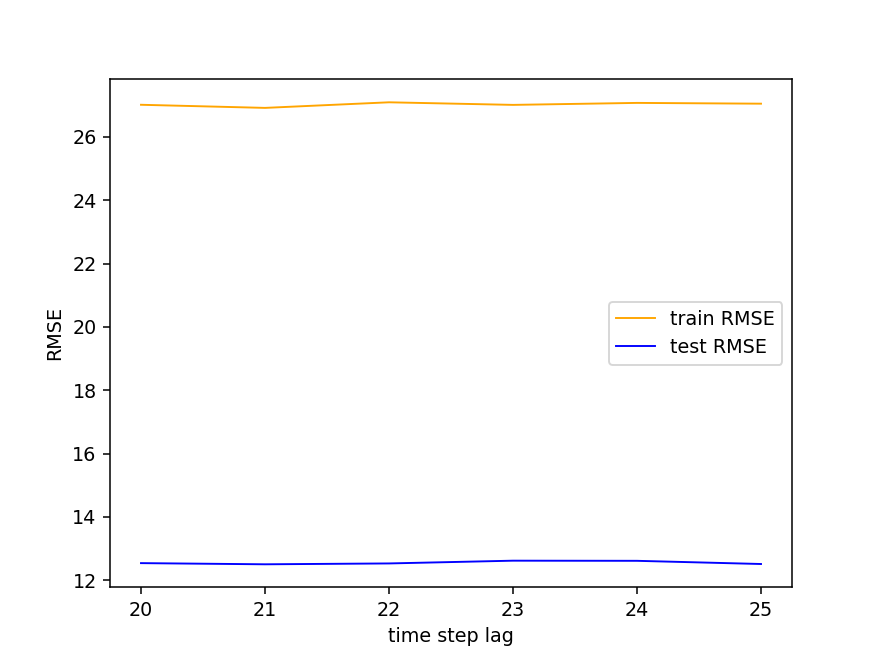

In [49]:
%matplotlib notebook

plt.ylabel('RMSE')
plt.xlabel('time step lag')
plt.plot(time_step_lag_array, train_rmse_array, '-', linewidth=1, color='orange', label='train RMSE')
plt.plot(time_step_lag_array, test_rmse_array, '-', linewidth=1, color='blue', label='test RMSE')  
plt.legend(loc='right')
plt.show()